In [2]:

import pandas as pd
from pathlib import Path

# ── 1. Cargar archivo ──────────────────────────────────────────────────────
file_path = Path(r"C:\Users\DAVID 21\OneDrive\Documentos\9no ciclo\IMLE\TextMineML\results\tables\basic\keywords_by_cluster.csv")
df = pd.read_csv(file_path)

# ── 2. Añadir columna “Cluster” y formatearla en negrita ───────────────────
df.insert(0, "Cluster", df.index)          # usa el índice como nº de cluster
df["Cluster"] = df["Cluster"].apply(lambda n: f"**{n}**")

# ── 3. Unir palabras con punto central ─────────────────────────────────────
keyword_cols = [str(i) for i in range(15)]  # columnas originales “0”–“14”
df["Palabras clave más discriminativas"] = (
    df[keyword_cols]
    .apply(lambda fila: " · ".join(fila.astype(str)), axis=1)
)

# ── 4. Tema dominante (lectura cualitativa) ────────────────────────────────
tema_dict = {
    0: ("Factores de riesgo clínico",
        "Estudios sobre pacientes, niveles y riesgo de enfermedad."),
    1: ("Salud pública peruana",
        "Investigaciones de salud poblacional, prevalencia y cuidados en Perú."),
    2: ("Tuberculosis y resistencia",
        "Trabajos centrados en TB, cepas resistentes y terapias."),
    3: ("Malaria y parasitosis",
        "Estudios sobre malaria, parásitos y transmisión en humanos."),
    # Si tuvieras más filas añade pares {n_cluster: (titulo, descripcion)}
}

df["Tema dominante (lectura cualitativa)"] = df.index.map(
    lambda n: f"**{tema_dict[n][0]}**: {tema_dict[n][1]}"
)

# ── 5. Conservar solo las tres columnas finales ────────────────────────────
salida = df[["Cluster",
             "Palabras clave más discriminativas",
             "Tema dominante (lectura cualitativa)"]]

# ── 6. Mostrar en Markdown o exportar (opcional) ───────────────────────────
print(salida.to_markdown(index=False))

# Para exportar a un nuevo CSV o a Excel:
# salida.to_csv("tabla_clusters.csv", index=False, encoding="utf-8")
# salida.to_excel("tabla_clusters.xlsx", index=False)


| Cluster   | Palabras clave más discriminativas                                                                                                                 | Tema dominante (lectura cualitativa)                                                             |
|:----------|:---------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------|
| **0**     | patient · high · increase · group · associate · disease · clinical · treatment · level · low · risk · year · include · compare · ci                | **Factores de riesgo clínico**: Estudios sobre pacientes, niveles y riesgo de enfermedad.        |
| **1**     | health · high · year · ci · peru · country · risk · age · low · associate · population · care · patient · prevalence · intervention                | **Salud pública peruana**: Investigaciones de salud

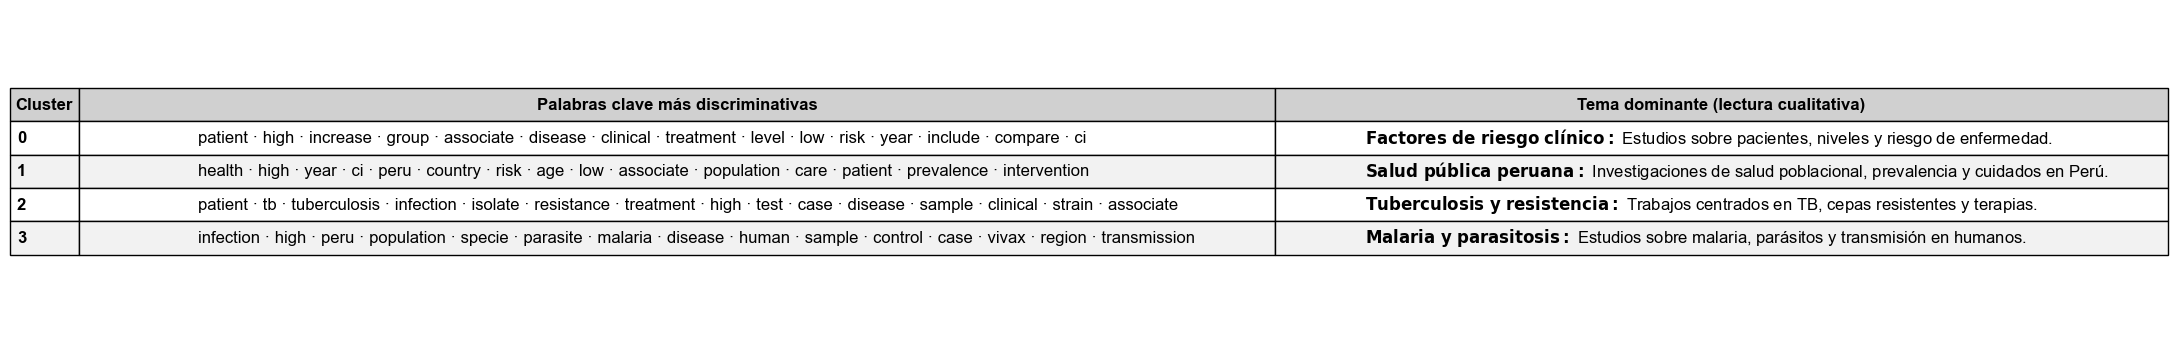

Imagen guardada en: tabla_clusters_arial.png


In [10]:
"""
Tabla estilizada:
  • Fuente Arial
  • Texto +2 pt sobre el script original
  • Filas 4 × más altas (mayor legibilidad)
  • Encabezados en gris, filas alternas blanco / gris claro
"""

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ── 1. Cargar archivo CSV ────────────────────────────────────────────
file_path = Path(r"C:\Users\DAVID 21\OneDrive\Documentos\9no ciclo\IMLE\TextMineML\results\tables\basic\keywords_by_cluster.csv")
df = pd.read_csv(file_path)

# ── 2. Transformaciones de columnas ──────────────────────────────────
df.insert(0, "Cluster", df.index.astype(str))

keyword_cols = [str(i) for i in range(15)]
df["Palabras clave más discriminativas"] = (
    df[keyword_cols].apply(lambda fila: " · ".join(fila.astype(str)), axis=1)
)

tema_dict = {
    0: ("Factores de riesgo clínico",  "Estudios sobre pacientes, niveles y riesgo de enfermedad."),
    1: ("Salud pública peruana",       "Investigaciones de salud poblacional, prevalencia y cuidados en Perú."),
    2: ("Tuberculosis y resistencia",  "Trabajos centrados en TB, cepas resistentes y terapias."),
    3: ("Malaria y parasitosis",       "Estudios sobre malaria, parásitos y transmisión en humanos."),
    # Añade aquí los títulos/descripciones para clusters 4-14 si los tienes
}

def bold_title(title):
    # Sustituye cada espacio por '\ ' para que MathText no lo colapse
    title_esc = title.replace(" ", r"\ ")
    return rf"$\bf{{{title_esc}:}}$ "

df["Tema dominante (lectura cualitativa)"] = df.index.map(
    lambda n: fr"$\bf{{{tema_dict[n][0]}:}}$ {tema_dict[n][1]}"
)
df["Tema dominante (lectura cualitativa)"] = df.index.map(
    lambda n: bold_title(tema_dict[n][0]) + tema_dict[n][1]
)


salida = df[["Cluster",
             "Palabras clave más discriminativas",
             "Tema dominante (lectura cualitativa)"]]

# ── 3. Parámetros de estilo global ────────────────────────────────────
plt.rcParams["font.family"] = "Arial"      # Usa Arial si está instalada
plt.rcParams["font.size"]   = 12           # +2 pt (ajusta si quieres más)
row_colors = ["#ffffff", "#f2f2f2"]        # blanco / gris muy claro

# ── 4. Dibujar la tabla ───────────────────────────────────────────────
fig_height = 0.8 * len(salida) + 1
fig, ax = plt.subplots(figsize=(18, fig_height))
ax.axis("off")

table = ax.table(
    cellText   = salida.values,
    colLabels  = salida.columns,
    cellLoc    = "left",
    loc        = "center",
    cellColours=[[row_colors[i % 2]] * len(salida.columns) for i in range(len(salida))]
)

# Encabezados
for j in range(len(salida.columns)):
    hdr = table[0, j]
    hdr.set_facecolor("#d0d0d0")
    hdr.set_text_props(weight="bold")

# Columna “Cluster” en negrita
for i in range(len(salida)):
    table[i + 1, 0].get_text().set_weight("bold")

# Ajustes de tamaño
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(salida.columns))))
table.scale(1, 2)           # ← filas 4 × más altas

# ── 5. Guardar / mostrar ─────────────────────────────────────────────
output_png = "tabla_clusters_arial.png"
plt.savefig(output_png, bbox_inches="tight", pad_inches=0.05, dpi=200)
plt.show()

print(f"Imagen guardada en: {output_png}")
